In [1]:
import os
import random
import sys

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

#from sklearn.svm import SVR
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

#from sklearn.linear_model import Ridge

from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error
#from sklearn.multioutput import MultiOutputRegressor
import math
#from yellowbrick.regressor import ResidualsPlot
#from sklearn.metrics import r2_score
import sklearn.gaussian_process as gp
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('database_new.xlsx')

# Leave g=0.4-0.5 as test set

In [3]:


# Load dataset

train_set=df[(df['g']<0.4) | (df['g']>0.5)]
test_set=df[(df['g']>=0.4) & (df['g']<=0.5)]
Y_train = train_set.iloc[:, [1,2]]
X_train = train_set.iloc[:, [0, 3, 7, 24, 25, 26, 27]]
Y_test = test_set.iloc[:, [1,2]]
X_test = test_set.iloc[:, [0, 3, 7, 24, 25, 26, 27]]

scaling_x = StandardScaler()
scaling_y = StandardScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)

regressor = KernelRidge(alpha=0.0001, gamma=0.5, kernel='rbf')

# wrapper=MultiOutputRegressor(regressor)
model = regressor.fit(X_train, Y_train)
# wrapper.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
# Y_pred=wrapper.predict(X_test)

Y_pred = scaling_y.inverse_transform(Y_pred)
Y_pred = pd.DataFrame(data=Y_pred, columns=["fractal_dimension", "fraction_of_coating"])
Y_test.reset_index(inplace=True)
Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["fractal_dimension", "fraction_of_coating"])

# logging difference between the two
Y_diff = Y_test - Y_pred


error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set ["fractal_dimension", "fraction_of_coating"]:-  ', error)




Mean absolute error on test set:  [0.02926    0.28688241]
Mean absolute error on test set ["fractal_dimension", "fraction_of_coating"]:-   [0.02926    0.28688241]


C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

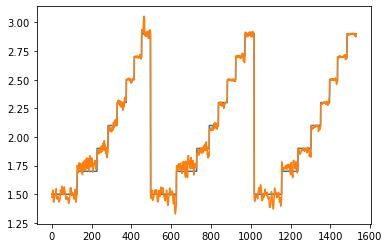

In [4]:
ax=Y_test['fractal_dimension'].plot()
Y_pred['fractal_dimension'].plot(ax=ax)

<AxesSubplot:>

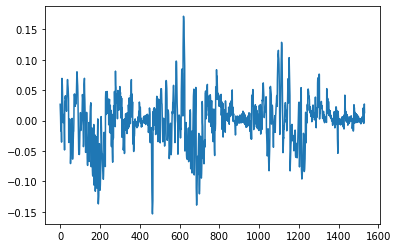

In [5]:
Y_diff['fractal_dimension'].plot()

<AxesSubplot:>

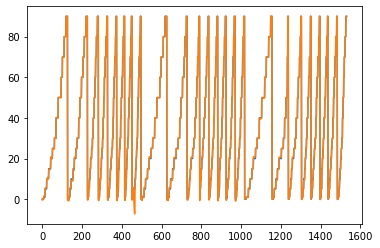

In [6]:
ax=Y_test['fraction_of_coating'].plot()
Y_pred['fraction_of_coating'].plot(ax=ax)

<AxesSubplot:>

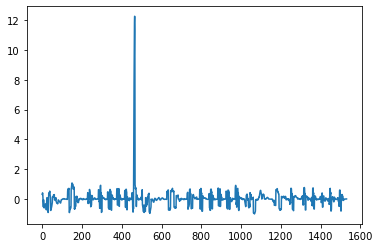

In [7]:
Y_diff['fraction_of_coating'].plot()

<AxesSubplot:>

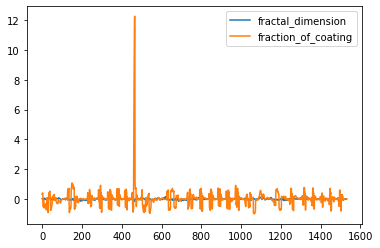

In [8]:
Y_diff.plot()

# Leave g>=0.75 as test set

In [15]:


# Load dataset

train_set = df[(df['g'] < 0.75)]
test_set = df[(df['g'] >= 0.75)]
Y_train = train_set.iloc[:, [1,2]]
X_train = train_set.iloc[:, [0, 3, 7, 24, 25, 26, 27]]
Y_test = test_set.iloc[:, [1,2]]
X_test = test_set.iloc[:, [0, 3, 7, 24, 25, 26, 27]]

scaling_x = StandardScaler()
scaling_y = StandardScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)

regressor = KernelRidge(alpha=0.0001, gamma=0.5, kernel='rbf')

# wrapper=MultiOutputRegressor(regressor)
model = regressor.fit(X_train, Y_train)
# wrapper.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
# Y_pred=wrapper.predict(X_test)

Y_pred = scaling_y.inverse_transform(Y_pred)
Y_pred = pd.DataFrame(data=Y_pred, columns=["fractal_dimension", "fraction_of_coating"])
Y_test.reset_index(inplace=True)
Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["fractal_dimension", "fraction_of_coating"])

# logging difference between the two
Y_diff = Y_test - Y_pred


error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set ["fractal_dimension", "fraction_of_coating"]:-  ', error)




Mean absolute error on test set:  [0.22031406 7.22096247]
Mean absolute error on test set ["fractal_dimension", "fraction_of_coating"]:-   [0.22031406 7.22096247]


C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

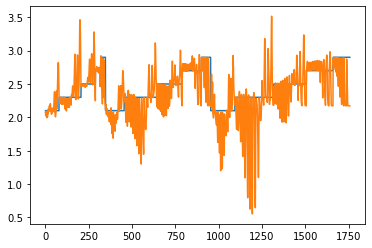

In [16]:
ax=Y_test['fractal_dimension'].plot()
Y_pred['fractal_dimension'].plot(ax=ax)

<AxesSubplot:>

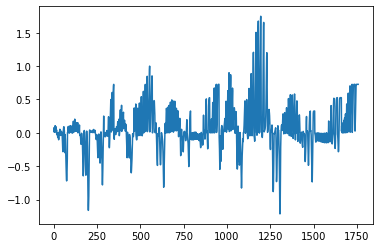

In [17]:
Y_diff['fractal_dimension'].plot()

<AxesSubplot:>

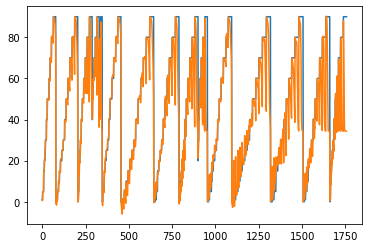

In [18]:
ax=Y_test['fraction_of_coating'].plot()
Y_pred['fraction_of_coating'].plot(ax=ax)

<AxesSubplot:>

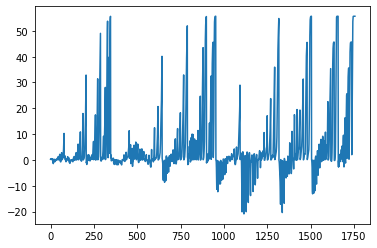

In [19]:
Y_diff['fraction_of_coating'].plot()

<AxesSubplot:>

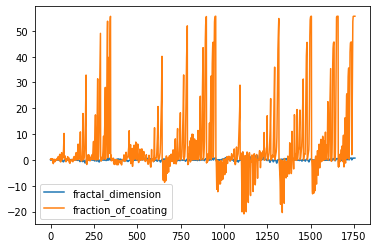

In [20]:
Y_diff.plot()